In [ ]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager

# save numpy array as csv file
from numpy import asarray

%matplotlib inline

from dataviz import utility as dviz
#_FIRST_INIT = True

In [ ]:
# X GOOGLE COLAB
base_path = Path('/content/drive/My Drive/AVRC/array_data/')
EXPORT_DIR = Path('/content/drive/My Drive/AVRC/export/')
#if _FIRST_INIT:
#  from google.colab import drive
#  import sys
#  drive.mount("/content/drive/")


#############################################################
###############   MODIFICARE QUI PER IL PATH   ##############
#base_path = Path('/array_data/') # X USO LOCALE
#EXPORT_DIR = Path('/export/') # X USO LOCALE
#############################################################
#############################################################

## dataviz setup
FONT_DIR = "./dataviz/fonts"
font_files = font_manager.findSystemFonts(fontpaths=FONT_DIR)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)


MATPLOTLIB_THEME_FILE = "./dataviz/mpl_theme.mplstyle"
plt.style.use(MATPLOTLIB_THEME_FILE)

theme = {"colors":{
            "avg_line": "blue",
            "avg_line_alpha": 0.5
        }, 
        "sizes": {
            "box_width": 0.3
        }}

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [36]:
# Metodi di utility

def load_data(save_path):
  data = None
  with open(save_path, 'rb') as file_data:
    data = np.load(file_data, allow_pickle=True)
  return data

# Wrapper da usare

def load_sir_data():
  return load_data(base_path/"aggregated/aggregated_data.npy")[3]
def load_sis_data():
  return load_data(base_path/"aggregated/sis_data.npy")
def load_sirs_1_data():
  return load_data(base_path/"aggregated/sirs_1_data.npy")
def load_sirs_2_data():
  return load_data(base_path/"aggregated/sirs_2_data.npy")
def load_sirs_3_data():
  return load_data(base_path/"aggregated/sirs_3_data.npy")

def plot_distributions(data, axes, aggregated=True):
  axes.plot(range(0, len(data[0])), data[0], label="SIR") #sir
  axes.plot(range(0, len(data[1])), data[1], alpha=0.9, label="SIS") #sis
  axes.plot(range(0, len(data[2])), data[2], alpha=0.8, label="SIRS-1") #sirs-1
  axes.plot(range(0, len(data[3])), data[3], alpha=0.5, label="SIRS-2") #sirs-2
  axes.plot(range(0, len(data[4])), data[4], alpha=0.4, label="SIRS-3") #sirs-3
  axes.set_ylim(-5, 140)
  axes.grid()
  axes.set(xlabel="Time Step", ylabel="# Infected Nodes", title="Epidemic Average-Infection Distribution")
  axes.xaxis.get_major_locator().set_params(integer=True)
  fig.show()
  if aggregated:
    figures['epidemic_sir_sis_sirs_distributions'] = fig

figures = {}

In [37]:
sir = load_sir_data()
sis = load_sis_data()
sirs_1 = load_sirs_1_data()
sirs_2 = load_sirs_2_data()
sirs_3 = load_sirs_3_data()

plotting_data = [sir, sis, sirs_1, sirs_2, sirs_3]

Stampa dati aggregati

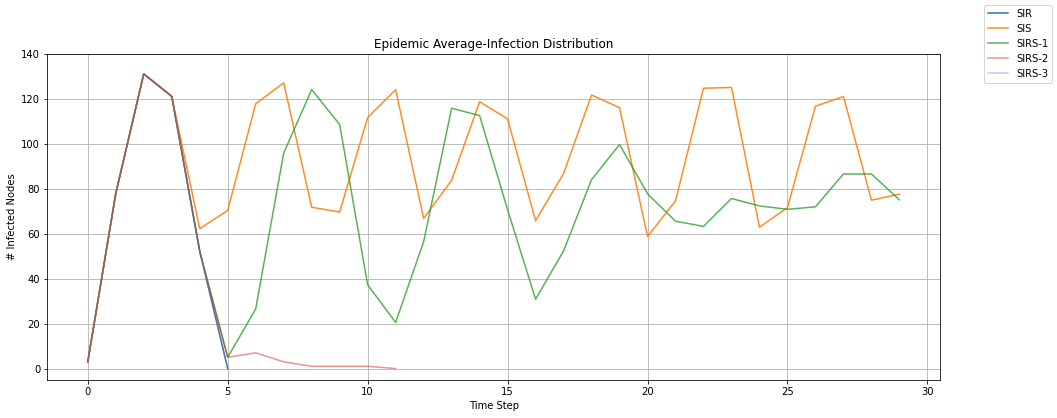

In [38]:
# PLOT RETE AGGREGATA CON PESI
fig, axes = plt.subplots(1,1, figsize=(16,6))
plot_distributions(plotting_data, axes)
fig.legend()
#dviz.add_legend(fig, axes, on_fig=True)

In [35]:
"SIRS1 -> I=2, SIRS2 -> I=3, SIRS3 -> I=4"

'SIRS1 -> I=2, SIRS2 -> I=3, SIRS3 -> I=4'

## Export Data

In [33]:
from pathlib import Path
import string

def setup_figure_for_export(fig):
  # no title since we'll add a caption, but add a panel with letter 
  if len(fig.axes) > 1:
    for ax, panel_label in zip(fig.axes, string.ascii_uppercase):
      ax.set_title("")
      ax.text(0.97, 1., panel_label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
  else:
    fig.axes[0].set_title("")
  return fig

In [34]:
formats  = ["pdf", "png"]

for name, fig in figures.items():
  for file_format in formats:
    file_path = EXPORT_DIR / f"{name}.{file_format}"
    print(f"saving {file_path}")
    fig = setup_figure_for_export(fig)
    fig.savefig(file_path, bbox_inches='tight')

saving /content/drive/My Drive/AVRC/export/epidemic_sir_sis_sirs_distributions.pdf
saving /content/drive/My Drive/AVRC/export/epidemic_sir_sis_sirs_distributions.png
